In [ ]:
#linear algebra,data preprocessing,Csv files
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for data cleaning
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import requests
from pprint import pprint

#for spacy 
from spacy.lang.en import English
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS




#for feature selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#evalution metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


#for clustering 
from sklearn.cluster import KMeans

In [ ]:

headers = {"Authorization": "Api-Key pnOscX2f.Q48hIMJw3MFjDvJbqXza1WPdIcww0AHm"}
res = requests.get('http://157.230.202.235:8001/api/obs/events/', headers=headers)
data = res.json()
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:

pprint(data['events'])

Streaming output truncated to the last 5000 lines.
               'he gastado\\u201d, indic\\u00f3.\\n\\nAdem\\u00e1s, Bonavides '
               'dijo que los procesos legales en M\\u00e9xico avanzan lento y '
               'm\\u00e1s cuando no se tiene dinero.\\n\\n\\u201cEl proceso '
               'legal va como en M\\u00e9xico los procesos legales cuando no '
               'tienes dinero, yo lo que he gastado es en las curaciones y en '
               'las operaciones y en salvarle la vida a mi '
               'mujer\\u201d.\\n\\nEn ese sentido, el actor asegur\\u00f3 que '
               'la justicia en M\\u00e9xico \\u201cno existe\\u201d. \\u201cNo '
               'pelan, no les interesa (\\u2026) no hay justicia, no hay nada, '
               'no les interesa que la gente se muera, que la gente tenga '
               'estas deficiencias, les vale\\u201d.", "top_image": '
               '"https://diario.mx/jrz/media/uploads/galeria/2021/05/10/20210510073134779-0-1793515.jpg

In [ ]:
texts =[]
num=0

for val in data['events']:
  try:
    val_dict =json.loads(val['meta_json'])
    texts.append(val_dict['text'])
  except:
    print("soemthing is wrong")
    pass

  
  # print(val_dict.keys(), val_dict['text'])
  # texts.append(val_dict['text'])

soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is wrong
soemthing is

In [ ]:
texts

['When Voyager-1 was launched on September 5, 1977, the team that worked on the probe had no idea that even after four decades, the spacecraft would still be sending critical data pings and that too from beyond the Solar System. Now in interstellar space, the area beyond the magnetic bubble inflated by our Sun, Voyager\'s data is revealing what that new frontier is like.\n\nA study published in Nature Astronomy reports what may be the first continuous measurement of the density of material in interstellar space. “This detection offers us a new way to measure the density of interstellar space and opens up a new pathway for us to explore the structure of the very nearby interstellar medium,” said Stella Ocker, a Ph.D. student at Cornell University and part of the Voyager team.\n\nThe Voyager mission crossed the heliosphere’s (the bubble formed by our Sun) boundary on August 25, 2012, becoming the first human-made object to enter and measure interstellar space. While the new measurements 

In [ ]:
df = pd.DataFrame(texts,columns=['text'])
df.head()

,text
0,"When Voyager-1 was launched on September 5, 19..."
1,An “incredible deep sea fish” with teeth as sh...
2,"On May 9, Manimegalai, mother of Venkat Prabhu..."
3,Reading to children should not be a chore. But...
4,One story dominated not just the Middle East a...


In [ ]:
df.shape

(915, 1)

In [ ]:
len(df[df['text'] == ""])

298

In [ ]:
df.loc[df['text'] == "", 'text'] = np.nan
df.dropna(subset=['text'], inplace=True)
len(df[df['text'] == ""])

0

In [ ]:
df.shape

(617, 1)

In [ ]:


nlp = spacy.load('en_core_web_sm') #for now we are using small model 


def process_text(data):

    master = []
    for text in data:
        print(text)
        doc = nlp(text)
        slave = []
        for token in doc:
            

            if not token.is_stop and not token.is_punct:
                if not token.like_num:
                    
                    slave.append(token.lemma_.lower().replace('\n',''))
        master.append(' '.join(slave))

    return master


result = process_text(df['text'])

Streaming output truncated to the last 5000 lines.

Yet neither she nor her parents have shared her campaigns with their friends or on social media, he adds. They have no idea who has contributed. Why, then, has she managed to touch many people’s hearts?

Perhaps, Anthony suggests, her campaigns capture people’s attention because they are worded simply.

Some of Rui Jie's past campaigns.

For example, he recalls both of them discussing how to word the School Pocket Money Fund campaign and eventually settling on “For the little P1 and P2 recess money”.

“It’s simple and succinct. And people would be able to … appreciate what we’re doing,” he cites.

(And because Rui Jie wanted to help children younger than her, the campaign was updated to include Primary Three pupils when she entered Primary Four.)

Her mother thinks the authenticity of her voice could also have played a part. “As a young girl, the way she phrases stories can be different in terms of the visuals and images that she sele

In [ ]:
!pip install sentence-transformers

In [ ]:
#transformer
from sentence_transformers import SentenceTransformer

transformer = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
corpus_embs = transformer.encode(result)

In [ ]:
corpus_embs.shape

(617, 768)

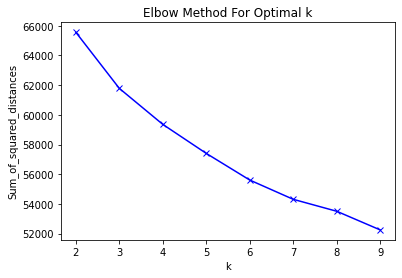

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(corpus_embs)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:

model = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
model.fit(corpus_embs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = model.labels_

In [ ]:
cluster_df = pd.DataFrame([result , labels]).T
cluster_df.columns = ['clean_text' ,'label' ]
cluster_df[:20]

,clean_text,label
0,voyager-1 launch september team work probe ide...,2
1,incredible deep sea fish tooth sharp glass was...,2
2,manimegalai mother venkat prabhu premgi amaren...,0
3,read child chore pleasure child get book lose ...,1
4,story dominate middle east north africa entire...,1
5,ninth birthday aunt buy colourful scent diary ...,1
6,difficult face disaster ahmed al matari sanaa ...,1
7,azerbaijan armenia close strike meaningful cea...,1
8,write dust cover laptop key jam ruminate sente...,0
9,survivor christchurch terror attack talk mee m...,0


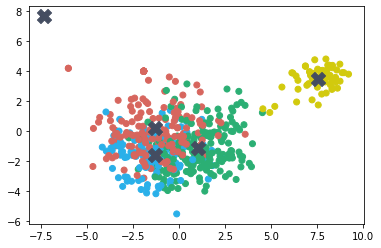

In [ ]:
from sklearn.decomposition import PCA

pca =PCA(n_components=3).fit(corpus_embs)
coords = pca.transform(corpus_embs)
label_colors = ['#2AB0E9','#2BAF74','#D7665E','#D2CA0D','#522A64','#A3DB05','#FC6514','#C7549F','#58C754','#C75459']
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:,0],coords[:,1],c=colors)
centriods =model.cluster_centers_
centriod_coords =pca.transform(centriods)
plt.scatter(centriod_coords[:,0],centriod_coords[:,1],marker='X',s=200, linewidths=1,c='#444d61')
plt.show()

In [ ]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(model, 'finalmodel.pkl')
  
# Load the model from the file
M1 = joblib.load('finalmodel.pkl') 